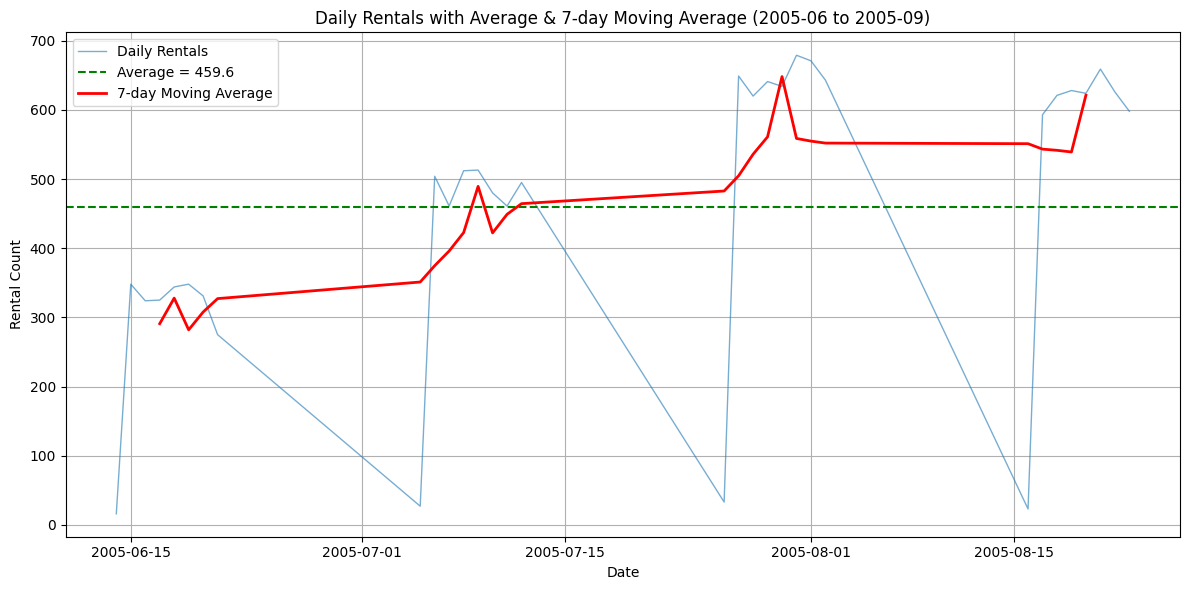

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

rental_csv = "csv_exports/rental.csv"

# 読み込み
df = pd.read_csv(rental_csv, parse_dates=["rental_date"])
df["date"] = df["rental_date"].dt.floor("D")

# 期間フィルタ：2005-06-01～2005-09-30
mask = (df["date"] >= "2005-06-01") & (df["date"] <= "2005-09-30")
df_filtered = df.loc[mask]

# 日次集計
daily = df_filtered.groupby("date").size().rename("rentals")

# 全体平均値
avg_rentals = daily.mean()

# 7日移動平均
rolling_avg = daily.rolling(window=7, center=True).mean()

# プロット
plt.figure(figsize=(12, 6))
plt.plot(daily.index, daily.values, linewidth=1, alpha=0.6, label="Daily Rentals")
plt.axhline(y=avg_rentals, color="green", linestyle="--", linewidth=1.5,
            label=f"Average = {avg_rentals:.1f}")
plt.plot(rolling_avg.index, rolling_avg.values, color="red", linewidth=2,
         label="7-day Moving Average")

plt.title("Daily Rentals with Average & 7-day Moving Average (2005-06 to 2005-09)")
plt.xlabel("Date")
plt.ylabel("Rental Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
